# Resize the images and save it in 512x512





## Use this Block if you are resizing an Inpainting Dataset

This is to resize an image folder give the input folder and the save folder path, make sure the image directory structure is as follows:

Dataset Folder:
>  --> image

>  --> mask


In [ ]:
import os
import cv2
root_path = '/content/drive/MyDrive/asd/test' #Copy the image folder path here
save_path = '/content/drive/MyDrive/asd/test2' #Give the Output Folder Path in Here
if not os.path.exists(save_path):
  os.mkdir(save_path)

mask_folder_save_path = os.path.join(save_path,'mask')
image_folder_save_path = os.path.join(save_path,'image')

if not os.path.exists(mask_folder_save_path):
  os.mkdir(mask_folder_save_path)

if not os.path.exists(image_folder_save_path):
  os.mkdir(image_folder_save_path )

image_folder_path = os.path.join(root_path,'image')
mask_folder_path = os.path.join(root_path,'mask')
for file in os.listdir(image_folder_path):
  image_path = os.path.join(image_folder_path,file)
  mask_path = os.path.join(mask_folder_path,file.split('.')[0]+'.jpg')
  print(mask_path)
  mask = cv2.imread(mask_path)
  image = cv2.imread(image_path)
  mask = cv2.resize(mask,(512,512))
  image = cv2.resize(image,(512,512))
  image_save_path = os.path.join(image_folder_save_path,file)
  mask_save_path = os.path.join(mask_folder_save_path,file)
  cv2.imwrite(image_save_path,image)
  cv2.imwrite(mask_save_path,mask)



/content/drive/MyDrive/nail_white/mask/IMG_20230328_090735.jpg
/content/drive/MyDrive/nail_white/mask/IMG_20230328_090747.jpg
/content/drive/MyDrive/nail_white/mask/IMG_20230328_090750.jpg
/content/drive/MyDrive/nail_white/mask/IMG_20230328_090753.jpg
/content/drive/MyDrive/nail_white/mask/IMG_20230328_090756.jpg
/content/drive/MyDrive/nail_white/mask/IMG_20230328_090809.jpg
/content/drive/MyDrive/nail_white/mask/IMG_20230328_090812.jpg
/content/drive/MyDrive/nail_white/mask/IMG_20230328_090825.jpg
/content/drive/MyDrive/nail_white/mask/IMG_20230328_090828.jpg
/content/drive/MyDrive/nail_white/mask/IMG_20230328_090833.jpg
/content/drive/MyDrive/nail_white/mask/IMG_20230328_090838.jpg
/content/drive/MyDrive/nail_white/mask/IMG_20230328_090902.jpg
/content/drive/MyDrive/nail_white/mask/IMG_20230328_090919.jpg
/content/drive/MyDrive/nail_white/mask/IMG_20230328_090923.jpg
/content/drive/MyDrive/nail_white/mask/IMG_20230328_090959.jpg
/content/drive/MyDrive/nail_white/mask/IMG_20230328_091

## Use this Block to resize an Img2Img or Text2Img dataset

The directory structure should be like this

Dataset Folder:

> --> image

Make sure to enter the root_path and the save_path below



In [ ]:
import os
import cv2

root_path = '/content/drive/MyDrive/nail_white' #Copy the image folder path here
save_path = '/content/drive/MyDrive/nail_white_re' #Give the Output Folder Path in Here

image_folder_path = os.path.join(root_path,'image')
save_folder_path = os.path.join(save_path,'image')

if not os.path.exists(save_path):
  os.mkdir(save_path)

if not os.path.exists(save_folder_path):
  os.mkdir(save_folder_path)

for file in os.listdir(image_folder_path):
  print(file)
  image = cv2.imread(os.path.join(image_folder_path,file))
  image = cv2.resize(image,(512,512))
  image_save = os.path.join(save_folder_path,file)
  cv2.imwrite(image_save,image)


IMG_20221227_180339.png
IMG_20221227_180342.png
IMG_20221227_180344.png
IMG_20221227_180358.png
IMG_20221227_180400.png
IMG_20221227_180402.png
IMG_20221227_180407.png
IMG_20221227_180409.png
IMG_20221227_180411.png
IMG_20221227_180413.png
IMG_20221227_180416.png
IMG_20221227_180429.png


# Choose any one of the following flows



*   Stable Diffusion Text2Img and Img2Img

*   Stable Diffusion Inpainting (Non Random Mask)








# Stable Diffusion Training (Text2Img and Img2Img)

In [ ]:
#@title Install the required libs
!pip install -U -qq git+https://github.com/huggingface/diffusers.git
!pip install -qq accelerate transformers ftfy
!pip install -qq "ipywidgets>=7,<8"

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.1/200.1 KB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 215.3/215.3 KB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 75.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 KB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 107.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 22.9 MB/s eta 0:00:00


In [ ]:
!git clone https://github.com/Whizz-Technologies/diffusers

Cloning into 'diffusers'...
remote: Enumerating objects: 17734, done.
remote: Total 17734 (delta 0), reused 0 (delta 0), pack-reused 17734
Receiving objects: 100% (17734/17734), 13.02 MiB | 23.82 MiB/s, done.
Resolving deltas: 100% (12670/12670), done.


In [ ]:
cd /content/diffusers/examples/dreambooth

/content/diffusers/examples/dreambooth


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Enter the path to **INSTANCE_DIR** and **OUTPUT_DIR**

In [ ]:
%env MODEL_NAME=runwayml/stable-diffusion-v1-5
%env INSTANCE_DIR=/content/drive/MyDrive/utensil
%env OUTPUT_DIR=/content/drive/MyDrive/asd/aaa # 会创建新的文件夹，如果原来有，会清除

env: MODEL_NAME=runwayml/stable-diffusion-v1-5
env: INSTANCE_DIR=/content/drive/MyDrive/utensil
env: OUTPUT_DIR=/content/drive/MyDrive/asd/aaa


### Run the below cell if you want to run the training from scratch and delete the previous saved model in that **OUTPUT_DIR**

In [ ]:

!rm -rf $OUTPUT_DIR

### The **TRAINING MODEL** starts here

give the appropiate prompt in **instance_prompt**

Enter the instance prompt, if you are training a style make sure the prompt is "with style [unique keyword]" and if its's a object "a [unique keyword]"

In [ ]:
!accelerate launch train_dreambooth.py \
  --pretrained_model_name_or_path=$MODEL_NAME  \
  --instance_data_dir=$INSTANCE_DIR \
  --output_dir=$OUTPUT_DIR \
  --instance_prompt="likkk" \
  --resolution=512 \
  --train_batch_size=1 \
  --gradient_accumulation_steps=1 --gradient_checkpointing  \
  --learning_rate=5e-6 \
  --lr_scheduler="constant" \
  --lr_warmup_steps=0 \
  --max_train_steps=1000 \
  --train_text_encoder

## Running Text2Img from the trained model

You have to give inputs for the following:

1. Enter the model_dir
2. Enter the Prompt

/usr/local/lib/python3.9/dist-packages/transformers/models/clip/feature_extraction_clip.py:28: FutureWarning: The class CLIPFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use CLIPImageProcessor instead.
  warnings.warn(


  0%|          | 0/250 [00:00<?, ?it/s]

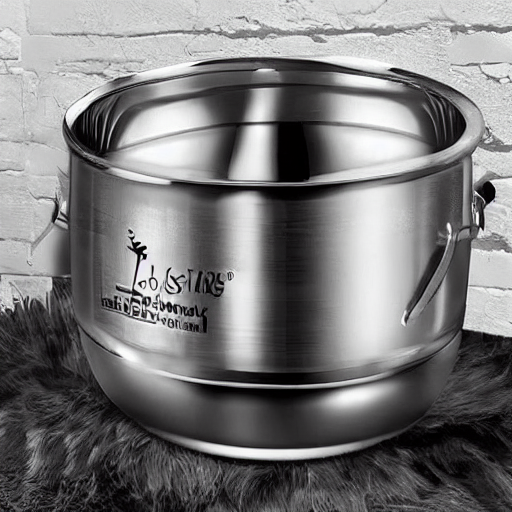

In [ ]:
from diffusers import StableDiffusionPipeline
import torch

model_dir = "/content/drive/MyDrive/asd/aaa" #Enter the model_dir "/content/drive/MyDrive/diffusion_model_no_inpaint_1000"

pipe = StableDiffusionPipeline.from_pretrained(
     model_dir,
     torch_dtype=torch.float16,
)
pipe = pipe.to("cuda")
def dummy(images, **kwargs):
    return images, False
pipe.safety_checker = dummy
prompt = "likkk" #Enter the Prompt

# generator = torch.Generator("cuda").manual_seed(3342)
# Strength is the how close model will replicate the image in img2img and num_inference_steps is the number of iteration the model will go
# guidance scale is how close the model will replicate the prompt
image = pipe(prompt=prompt, num_inference_steps=250, guidance_scale=7.5).images[0]
image

## Running Img2Img from the trained model

You have to give inputs for the following:

1. Enter the model_dir
2. Enter the Prompt
3. Enter the Image Path

  0%|          | 0/120 [00:00<?, ?it/s]

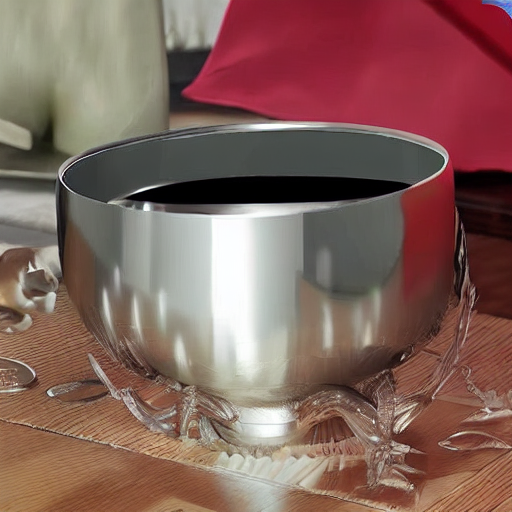

In [ ]:
from diffusers import StableDiffusionImg2ImgPipeline
import torch
from PIL import Image

model_dir = "/content/drive/MyDrive/diffusion_model_no_inpaint_1000" #Enter the model dir

pipe = StableDiffusionImg2ImgPipeline.from_pretrained(
     model_dir,
     torch_dtype=torch.float16,
)

pipe = pipe.to("cuda")
def dummy(images, **kwargs):
    return images, False
pipe.safety_checker = dummy
prompt = "jhantu" #Enter the Prompt


img_path = '/content/drive/MyDrive/test_utensil/测试图片/assd06.png'  #image path
img  = Image.open(img_path).convert("RGB")
img = img.resize((512, 512))

generator = torch.Generator("cuda").manual_seed(3342)
images = pipe(prompt=prompt, image=img, strength=0.4, guidance_scale=30, num_inference_steps=300).images
images[0]

# Stable Diffusion Training (Inpainting) 

In [ ]:
#@title Install the required libs
!pip install -U -qq git+https://github.com/Whizz-Technologies/diffusers
!pip install -qq accelerate transformers ftfy
!pip install -qq "ipywidgets>=7,<8"

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [ ]:
!git clone https://github.com/Whizz-Technologies/diffusers

fatal: destination path 'diffusers' already exists and is not an empty directory.


In [ ]:
cd /content/diffusers/examples/research_projects/dreambooth_inpaint

/content/diffusers/examples/research_projects/dreambooth_inpaint


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install bitsandbytesa

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement bitsandbytesa (from versions: none)
ERROR: No matching distribution found for bitsandbytesa


### Enter the path to **INSTANCE_DIR** , **OUTPUT_DIR** and **MASK_DIR**

In [ ]:
%env MODEL_NAME=runwayml/stable-diffusion-inpainting
%env INSTANCE_DIR=/content/drive/MyDrive/nail_white_re/image
%env OUTPUT_DIR=/content/drive/MyDrive/diffusion_model_style_nail_white
%env MASK_DIR=/content/drive/MyDrive/nail_white_re/mask

env: MODEL_NAME=runwayml/stable-diffusion-inpainting
env: INSTANCE_DIR=/content/drive/MyDrive/nail_white_re/image
env: OUTPUT_DIR=/content/drive/MyDrive/diffusion_model_style_nail_white
env: MASK_DIR=/content/drive/MyDrive/nail_white_re/mask


### Run the below cell if you want to run the training from scratch and delete the previous saved model in that **OUTPUT_DIR**

In [ ]:
!rm -rf $OUTPUT_DIR

### The **TRAINING MODEL** starts here, 

give the appropiate prompt in **instance_prompt**

In [ ]:
!accelerate launch train_dreambooth_inpaint.py \
  --pretrained_model_name_or_path=$MODEL_NAME  \
  --instance_data_dir=$INSTANCE_DIR \
  --mask_data_dir=$MASK_DIR \
  --output_dir=$OUTPUT_DIR \
  --instance_prompt="a nail design ganduhaikyagghhgg" \
  --resolution=512 \
  --train_batch_size=1 \
  --learning_rate=5e-6 \
  --lr_scheduler="constant" \
  --lr_warmup_steps=0 \
  --max_train_steps=3020 \
  --train_text_encoder \
  --resume_from_checkpoint=latest \
  --gradient_accumulation_steps=1 \
  --gradient_checkpointing  

2023-04-09 13:20:35.784686: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
[13:20:36] WARNING  The following values were not passed to        ]8;id=75401;file:///usr/local/lib/python3.9/dist-packages/accelerate/commands/launch.py\launch.py]8;;\:]8;id=370736;file:///usr/local/lib/python3.9/dist-packages/accelerate/commands/launch.py#895\895]8;;\
                    `accelerate launch` and had defaults used                   
                    instead:                                                    
                            `--num_processes` was set to a value                
                    of `1`                                                      
                            `--num_machines` was set to a value of              
                    `1`                                                         
                            `--mixed_precision` was set to a value              
                    of `'no'`

## Running Img2Img from the trained model

You have to give inputs for the following:

1. Enter the model_dir
2. Enter the Prompt
3. Enter the Image Path
4. Enter the mask path

  0%|          | 0/200 [00:00<?, ?it/s]

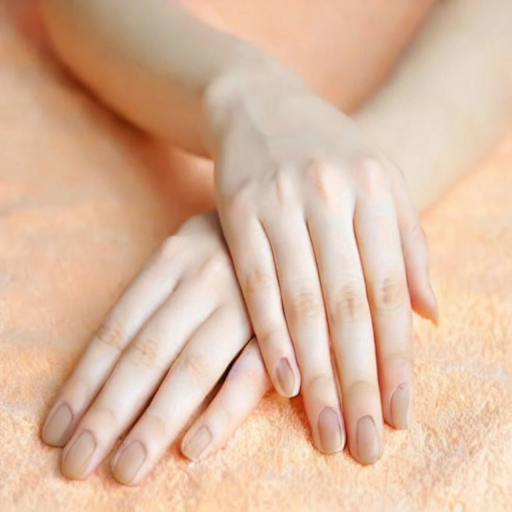

In [ ]:
from diffusers import StableDiffusionInpaintPipeline
import torch
import numpy as np

model_path = '/content/drive/MyDrive/diffusion_model_style_trans_heart'
pipe = StableDiffusionInpaintPipeline.from_pretrained(
     model_path,
     torch_dtype=torch.float16,
)
pipe = pipe.to("cuda")

prompt = "ganduhaikyagghhgg glossy very high quality very reflective and glossy" #Enter the Prompt


from PIL import Image

def dummy(images, **kwargs):
    return images, False
pipe.safety_checker = dummy

mask_path = '/content/drive/MyDrive/test_nails/2C29D473-CCB4-458C-926B-99D0042161E6_mask.jpg'
mask = Image.open(mask_path)
mask = mask.resize((512,512))
array = np.zeros([512, 512, 3],
                 dtype = np.uint8)

array[:, :] = [255, 255, 255] 
img_path = '/content/drive/MyDrive/test_nails/2C29D473-CCB4-458C-926B-99D0042161E6.jpg'
img  = Image.open(img_path)
img = img.resize((512,512))
generator = torch.Generator("cuda").manual_seed(78688)
image = pipe(prompt=prompt, image=img, mask_image=mask, num_inference_steps=200, guidance_scale=7.5, generator=generator).images[0]
image


In [ ]:
from google.colab import runtime
runtime.unassign()